# Image segmentation using K-mean Clustering 

In [76]:
# Loading required libraries
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 

## cv2.imread
Use the function cv2.imread() to read an image. <br>

argument 1 : The image should be in the working directory or a full path of image should be given.<br>
argument 2 : Is a flag which specifies the way image should be read.
    - cv2.IMREAD_COLOR : Loads a color image. Any transparency of image will be neglected. It is the default flag.
    - cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode
    - cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel
<em> Note: Instead of these three flags, you can simply pass integers 1, 0 or -1 respectivel</em>

In [77]:
image = cv2.imread('images/lamborghini.jpg') 

## cv2.imshow
Use this function to display an image in a window. The window automatically fits to the image size.<br>
argument 1 : window name which is a string.<br>
argument 2 : image

In [78]:
cv2.imshow('image',image)

#argument is the time in milliseconds if 0 it waits indefinitely for a key stroke
cv2.waitKey(0)

#cv2.destroyAllWindows() # It distroy all window
cv2.destroyWindow('image') # Distroying the initiated window

## cv2.cvtColor
It is used to convert an image from one color space to another. There are more than 150 color-space conversion methods available in OpenCV<br>
#### Parameters:
- src   : It is the image whose color space is to be changed.
- code  : It is the color space conversion code.
- dst   : It is the output image of the same size and depth as src image. It is an optional parameter.
- dstCn : It is the number of channels in the destination image. If the parameter is 0 then the number of the channels is derived automatically from src and code. It is an optional parameter.

#### Return Value:
- It returns an image

In [79]:
# Change color to RGB (from BGR) 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

  

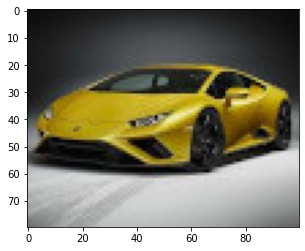

In [80]:
plt.imshow(image) # https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.imshow.html

In [81]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB) 
pixel_vals = image.reshape((-1,3)) # numpy reshape operation -1 unspecified 

# Convert to float type only for supporting cv2.kmean
pixel_vals = np.float32(pixel_vals)

## cv2.kmeans
#### Parameters:
- samples : It should be of np.float32 data type, and each feature should be put in a single column.<br>
- nclusters(K) : Number of clusters required at end<br>
- criteria : It is the iteration termination criteria. When this criteria is satisfied, algorithm iteration stops. Actually, it should be a tuple of 3 parameters. They are `( type, max_iter, epsilon )`:<br>
  - type of termination criteria. It has 3 flags as below:
    - cv.TERM_CRITERIA_EPS - stop the algorithm iteration if specified accuracy, epsilon, is reached.
    - cv.TERM_CRITERIA_MAX_ITER - stop the algorithm after the specified number of iterations, max_iter.
   - cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER - stop the iteration when any of the above condition is met.
   - max_iter - An integer specifying maximum number of iterations.<br>
epsilon - Required accuracy<br>
- attempts : Flag to specify the number of times the algorithm is executed using different initial labellings. The algorithm returns the labels that yield the best compactness. This compactness is returned as output.<br>
- flags : This flag is used to specify how initial centers are taken. Normally two flags are used for this : cv.KMEANS_PP_CENTERS and cv.KMEANS_RANDOM_CENTERS.

#### Return Value:
- compactness : It is the sum of squared distance from each point to their corresponding centers.
- labels : This is the label array (same as 'code' in previous article) where each element marked '0', '1'.....
- centers : This is array of centers of clusters.

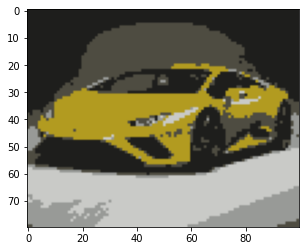

In [82]:
#the below line of code defines the criteria for the algorithm to stop running,  
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)  
#becomes 85% 
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85) 
  
# Choosing number of cluster
k = 5

retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 
  
# convert data into 8-bit values 
centers = np.uint8(centers) 


segmented_data = centers[labels.flatten()] # Mapping labels to center point( RGB Value)

  
# reshape data into the original image dimensions 
segmented_image = segmented_data.reshape((image.shape)) 
  
plt.imshow(segmented_image)